In [24]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np
import os

In [25]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_and_augment_images(base_path, labels, image_size=150, augment=False):
    X = []
    Y = []
    
    # Create an ImageDataGenerator for augmentation
    if augment:
        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            vertical_flip=False,
            zoom_range=0.2,
            shear_range=0.2,
            fill_mode='nearest'
        )

    for label in labels:
        folder_path = os.path.join(base_path, label)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img.astype('float32') / 255.0  # Normalize the image
            
            X.append(img)
            Y.append(label)
            
            # Generate augmented images only for training data
            if augment:
                img_array = img.reshape((1,) + img.shape)
                i = 0
                for batch in datagen.flow(img_array, batch_size=1):
                    augmented_img = batch[0]
                    X.append(augmented_img)
                    Y.append(label)
                    i += 1
                    if i >= 3:  # Generate 3 augmented images for each original image
                        break

    return np.array(X), np.array(Y)

# Define your labels and paths
labels = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']
train_path = r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Healthathon\chest_cancer\Data\train"
test_path = r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Healthathon\chest_cancer\Data\test"

# Load and augment training data
X_train, Y_train = load_and_augment_images(train_path, labels, augment=True)

# Load test data (without augmentation)
X_test, Y_test = load_and_augment_images(test_path, labels, augment=False)

print(f"Number of training images after augmentation: {len(X_train)}")
print(f"Shape of the training data: {X_train.shape}")
print(f"Number of test images: {len(X_test)}")
print(f"Shape of the test data: {X_test.shape}")

Number of training images after augmentation: 2452
Shape of the training data: (2452, 150, 150, 3)
Number of test images: 354
Shape of the test data: (354, 150, 150, 3)


In [26]:
y_train_new = []
for i in Y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
Y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in Y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
Y_test = tf.keras.utils.to_categorical(y_test)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Input(shape=(150, 150, 3)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(4, activation='softmax')  # Changed to 2 units with softmax activation
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',  # Changed to categorical_crossentropy
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.optimizers import Adam

In [30]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [31]:
X_train.shape

(2452, 150, 150, 3)

In [16]:
y_pred = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step


In [17]:
scores = model.evaluate(X_test,y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.8280 - loss: 1.4940


In [18]:
scores = model.evaluate(X_train, y_train,verbose=1)

97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9983 - loss: 0.0099


In [19]:
model

<Sequential name=sequential, built=True>

In [20]:
model.save('saved.h5')

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

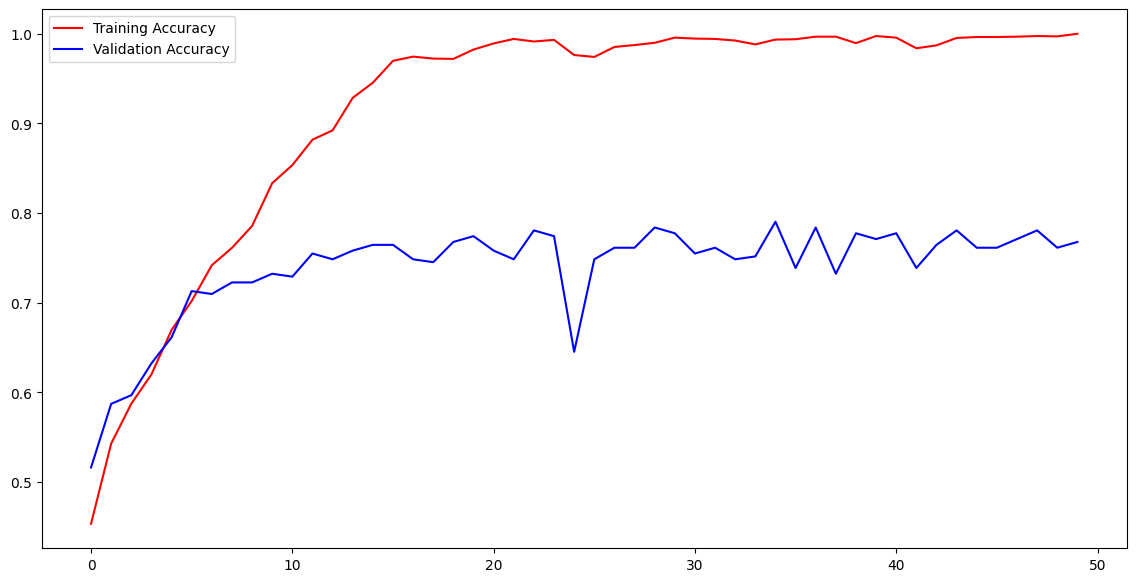

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

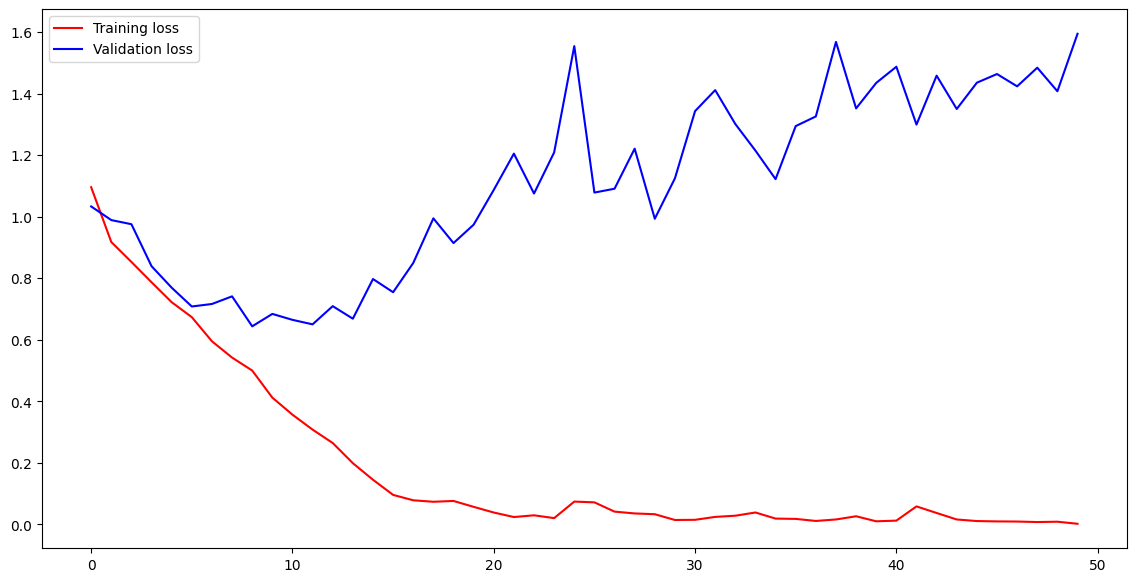

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [24]:
img = cv2.imread(r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Healthathon\chest_cancer\Data\train\adenocarcinoma\000008 (10).png")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [25]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

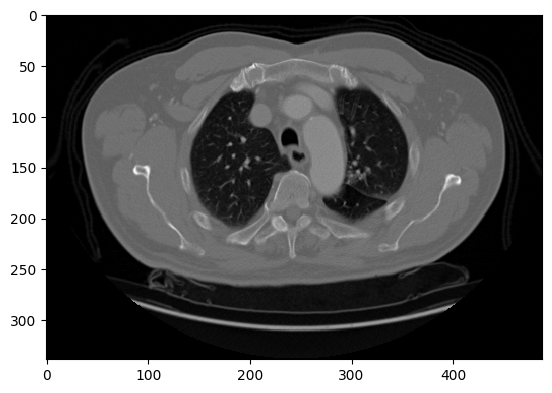

In [26]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Healthathon\chest_cancer\Data\test\squamous.cell.carcinoma\000108 (6).png")
plt.imshow(img,interpolation='nearest')
plt.show()

In [27]:
a=model.predict(img_array)
indices = a.argmax()
indices



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


2

In [28]:
model.save('model.h5')

In [29]:
model.save('Brain_Tumor.keras')

In [30]:
model

<Sequential name=sequential, built=True>

In [31]:
import pickle

In [32]:
pickle.dump(model , open("model.pkl" , "wb"))

model = pickle.load(open("model.pkl", "rb"))

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [33]:
# img_path = r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Brain_Tumor\Testing\no_tumor\image(2).jpg"
# img = cv2.imread(img_path)
# plt.imshow(img)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,662 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


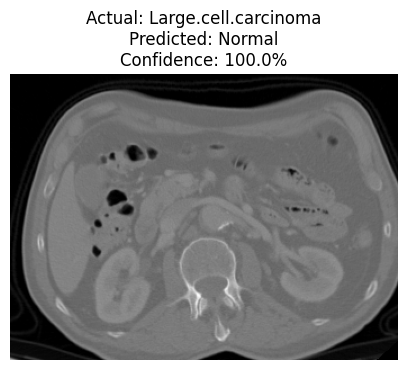

Adenocarcinoma: 0.00%
Large.cell.carcinoma: 0.00%
Normal: 100.00%
Squamous.cell.carcinoma: 0.00%
Predicted class: Normal
Confidence: 100.0%
Actual class: Large.cell.carcinoma


In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input

def predict_and_display_tumor(model, img_path, class_names):
    # Load and preprocess the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_resized = cv2.resize(img, (150, 150))
    img_array = np.expand_dims(img_resized, axis=0)
    img_array = preprocess_input(img_array)  # Use InceptionV3 preprocessing

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = round(100 * np.max(predictions[0]), 2)

    # Determine actual class from the image path
    actual_class = next((name for name in class_names if name.lower() in img_path.lower()), "Unknown")

    # Display the image and prediction
    plt.figure(figsize=(5, 7))
    plt.imshow(img)
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
    plt.axis('off')
    plt.show()

    # Print all class probabilities
    for name, prob in zip(class_names, predictions[0]):
        print(f"{name}: {prob*100:.2f}%")

    return predicted_class, confidence, actual_class

# Load the model
model_path = r'C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Healthathon\chest_cancer\model.h5'
model = load_model(model_path)

# Print model summary
model.summary()

# Your classes (make sure these match the order used during training)
class_names = ['Adenocarcinoma', 'Large.cell.carcinoma', 'Normal', 'Squamous.cell.carcinoma']

# Predict on a new image
img_path = r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Healthathon\chest_cancer\Data\test\large.cell.carcinoma\000109.png"
predicted_class, confidence, actual_class = predict_and_display_tumor(model, img_path, class_names)

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence}%")
print(f"Actual class: {actual_class}")